# Instacart Customer Purchase Behaviour Analysis

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd


In [2]:
# leer conjuntos de datos en los DataFrames
orders = pd.read_csv('/datasets/instacart_orders.csv',sep=';')
products = pd.read_csv ('/datasets/products.csv',sep=';')
aisles = pd.read_csv('/datasets/aisles.csv',sep=';')
departments = pd.read_csv('/datasets/departments.csv',sep=';')
order_products = pd.read_csv('/datasets/order_products.csv',sep=';')

In [3]:
# mostrar información del DataFrame 'orders'
orders.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 478967 entries, 0 to 478966
,Data columns (total 6 columns):
, #   Column                  Non-Null Count   Dtype  
,---  ------                  --------------   -----  
, 0   order_id                478967 non-null  int64  
, 1   user_id                 478967 non-null  int64  
, 2   order_number            478967 non-null  int64  
, 3   order_dow               478967 non-null  int64  
, 4   order_hour_of_day       478967 non-null  int64  
, 5   days_since_prior_order  450148 non-null  float64
,dtypes: float64(1), int64(5)
,memory usage: 21.9 MB


In [4]:
# mostrar información del DataFrame 'products'
products.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 49694 entries, 0 to 49693
,Data columns (total 4 columns):
, #   Column         Non-Null Count  Dtype 
,---  ------         --------------  ----- 
, 0   product_id     49694 non-null  int64 
, 1   product_name   48436 non-null  object
, 2   aisle_id       49694 non-null  int64 
, 3   department_id  49694 non-null  int64 
,dtypes: int64(3), object(1)
,memory usage: 1.5+ MB


In [5]:
# mostrar información del DataFrame 'aisles'
aisles.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 134 entries, 0 to 133
,Data columns (total 2 columns):
, #   Column    Non-Null Count  Dtype 
,---  ------    --------------  ----- 
, 0   aisle_id  134 non-null    int64 
, 1   aisle     134 non-null    object
,dtypes: int64(1), object(1)
,memory usage: 2.2+ KB


In [6]:
# mostrar información del DataFrame 'departments'
departments.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 21 entries, 0 to 20
,Data columns (total 2 columns):
, #   Column         Non-Null Count  Dtype 
,---  ------         --------------  ----- 
, 0   department_id  21 non-null     int64 
, 1   department     21 non-null     object
,dtypes: int64(1), object(1)
,memory usage: 464.0+ bytes


In [7]:
# mostrar información del DataFrame 'order_products'
order_products.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 4545007 entries, 0 to 4545006
,Data columns (total 4 columns):
, #   Column             Dtype  
,---  ------             -----  
, 0   order_id           int64  
, 1   product_id         int64  
, 2   add_to_cart_order  float64
, 3   reordered          int64  
,dtypes: float64(1), int64(3)
,memory usage: 138.7 MB


## Conclusiones
Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.


Este paso es una familiarización con el contenido de los datos. Puede ser muy sencillo suponer el contenido de cada Data Frame, pero una buena práctica es la evaluación de los datos para poder preparar un plan de acción para los siguientes pasos.

En este conjunto de DataFrames, la información es similar en cada uno de los data frame, podemos conocer el total de entradas. Aún no es posible determinar con certeza los valores nulos ya que la información está agrupada en una sola columna. En los siguientes pasos sera indispensable, además de una limpieza de información, la creación de columnas en cada uno de los DataFrame a trabajar. 

Es importante tener en cuenta que la división de columnas nos ayudará a una mejor definición de los datos de momento todo el contenido es de tipo ‘object’, para poder trabajar con la información será necesario, además de etiquetar correctamente las columnas, asignar correctamente los ‘strings’, ‘int’,’float’ o ‘bool. Adicionalmente se revisaron las entradas válidas y los valores nulos. 

Aún queda trabajo por hacer, pero conocer con qué elementos contamos al inicio de un proyecto es un buen inicio de partida.



# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.



- Verificar y corregir los tipos de datos duplicados
- identificar y completar valores ausentes: usar función .insull().sum().fillna()
- identidicar y eliminar valores duplicados: .duplicated().sum()

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados en 'orders'
orders.duplicated()

#cuantas lienas duplicadas hay
orders_duplicated = orders.duplicated().sum()
print(orders_duplicated)

duplicados = orders.value_counts()
print(duplicados)



15
,order_id  user_id  order_number  order_dow  order_hour_of_day  days_since_prior_order
,1021560   53767    3             3          2                  9.0                       2
,467134    63189    21            3          2                  2.0                       2
,391768    57671    19            3          2                  10.0                      2
,2282673   86751    49            3          2                  2.0                       2
,408114    68324    4             3          2                  18.0                      2
,                                                                                        ..
,1141863   88987    2             1          11                 14.0                      1
,1141854   125458   91            6          8                  2.0                       1
,1141847   156072   4             2          21                 6.0                       1
,1141845   153218   2             3          8                  6.0               

##### ¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?
Si, hay 15 filas duplicadas, lo que indica que hay pedidos duplicados. 
En la columna order_dow hay un 3 ; partiendo que 0 = a Domingo hay un patron de duplicados en miercoles entre las 2:2:0 y las 2:16:0

Encontré que el index del DataFrame 'Orders' estaba separado por ';', lo cual producia un error al correr el codigo. Después de mucho investigar, he encontrado que es un error del archivo CSV el cual se puede solucionar con agregar sep=';' a continuación de la ruta del archivo. Regresando a los primeros pasos, de este ejercicio, el codigo para orders queda de la siguiente forma:

orders = pd.read_csv('/datasets/instacart_orders.csv',sep=';')

In [9]:
print(orders.columns)


Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
,       'days_since_prior_order'],
,      dtype='object')


In [10]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
miercoles_2am = orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]

print(miercoles_2am)


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
,4838     2766110   162084            41          3                  2   
,5156     2190225   138285            18          3                  2   
,15506     553049    58599            13          3                  2   
,18420     382357   120200            19          3                  2   
,24691     690242    77357             2          3                  2   
,...          ...      ...           ...        ...                ...   
,457013   3384021    14881             6          3                  2   
,458816    910166   164782            18          3                  2   
,459635   1680532   106435             6          3                  2   
,468324    222962    54979            59          3                  2   
,477526   2592344    46860            38          3                  2   
,
,        days_since_prior_order  
,4838                      16.0  
,5156                      11.0  
,15506   

¿Qué sugiere este resultado?
Que tenemos 121 ordenes, y habrá que revisar cuanta información no esta duplicada unicamente para los pedidos, los cuales se encuentran en 'order_id'.


In [11]:
# m2_duplicadas = miercoles_2am['order_id'].value_counts()
# print(m2_duplicadas)

# Elimina los pedidos duplicados
miercoles_2am_sin_duplicados = miercoles_2am.drop_duplicates(subset='order_id')
print(miercoles_2am_sin_duplicados)


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
,4838     2766110   162084            41          3                  2   
,5156     2190225   138285            18          3                  2   
,15506     553049    58599            13          3                  2   
,18420     382357   120200            19          3                  2   
,24691     690242    77357             2          3                  2   
,...          ...      ...           ...        ...                ...   
,457013   3384021    14881             6          3                  2   
,458816    910166   164782            18          3                  2   
,459635   1680532   106435             6          3                  2   
,468324    222962    54979            59          3                  2   
,477526   2592344    46860            38          3                  2   
,
,        days_since_prior_order  
,4838                      16.0  
,5156                      11.0  
,15506   

In [12]:
# Vuelve a verificar si hay filas duplicadas
print(miercoles_2am_sin_duplicados.duplicated().sum())

0


In [13]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(miercoles_2am_sin_duplicados['order_id'].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos
Originalmente teniamos 121 rows para order_id, ahora son 106 rows = se comprobo que había 15 ordenes duplicadas.


### `products` data frame

In [14]:
# Verifica si hay filas (row) totalmente duplicadas
duplicate_rows = products.duplicated()
print(duplicate_rows.sum())

0


In [15]:
# Revisa únicamente si hay ID de productos duplicados
duplicated_ids = products['product_id'].duplicated()
print(duplicated_ids.sum())

0


In [16]:
# print(products.columns) Hay inconsistencia en las mayusculas y minusculas.

# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products['product_name'] = products['product_name'].str.upper()
unique_product_names = products['product_name'].unique()
print(unique_product_names)


['CHOCOLATE SANDWICH COOKIES' 'ALL-SEASONS SALT'
, 'ROBUST GOLDEN UNSWEETENED OOLONG TEA' ... 'ARTISAN BAGUETTE'
, 'SMARTBLEND HEALTHY METABOLISM DRY CAT FOOD' 'FRESH FOAMING CLEANSER']


In [17]:
# Revisa si hay nombres duplicados de productos no faltantes

print(products.info())

# Mostrar conteo de valores faltantes en cada columna
print("\nValores faltantes por columna:")
print(products.isna().sum())

# Mostrar conteo de valores únicos en 'product_name', incluyendo NaN
print("\nConteo de valores únicos en 'product_name' (incluyendo NaN):")
print(products['product_name'].value_counts(dropna=False))

# Filas donde 'product_name' no sea NaN
products_notna = products[products['product_name'].notna()].copy()

# Contar ocurrencias de cada 'product_name' excluyendo NaN
counts = products_notna['product_name'].value_counts()

print("\nConteo de productos duplicados (excluyendo NaN):")
print(counts[counts > 1])  # Solo los que están repetidos

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 49694 entries, 0 to 49693
,Data columns (total 4 columns):
, #   Column         Non-Null Count  Dtype 
,---  ------         --------------  ----- 
, 0   product_id     49694 non-null  int64 
, 1   product_name   48436 non-null  object
, 2   aisle_id       49694 non-null  int64 
, 3   department_id  49694 non-null  int64 
,dtypes: int64(3), object(1)
,memory usage: 1.5+ MB
,None
,
,Valores faltantes por columna:
,product_id          0
,product_name     1258
,aisle_id            0
,department_id       0
,dtype: int64
,
,Conteo de valores únicos en 'product_name' (incluyendo NaN):
,NaN                                                 1258
,GREEN TEA WITH GINSENG AND HONEY                       3
,PINEAPPLE SLICES IN 100% PINEAPPLE JUICE               2
,HERRING IN WINE SAUCE                                  2
,VITAMIN D3 5000 IU                                     2
,                                                    ... 
,ORGANIC SEAWEED

Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `departments` data frame

In [18]:
#departments.head()

In [19]:
# Revisa si hay filas(row) totalmente duplicadas

departments_duplicated_row = departments.duplicated().sum()
print(departments_duplicated_row)

0


In [20]:
# Revisa únicamente si hay IDs duplicadas de departamentos
unique_departments_id = departments['department_id'].value_counts(dropna=False)
print(unique_departments_id)

1     1
,12    1
,20    1
,19    1
,18    1
,17    1
,16    1
,15    1
,14    1
,13    1
,11    1
,2     1
,10    1
,9     1
,8     1
,7     1
,6     1
,5     1
,4     1
,3     1
,21    1
,Name: department_id, dtype: int64


### `aisles` data frame

In [21]:
#aisles.head()

In [22]:
# Revisa si hay filas totalmente duplicadas
aisles_duplicated_row = aisles.duplicated().sum()
print(aisles_duplicated_row)

0


In [23]:
# Revisa únicamente si hay IDs duplicadas de pasillos
unique_aisle_id = aisles['aisle_id'].value_counts(dropna=False)
print(unique_aisle_id)

1      1
,85     1
,99     1
,98     1
,97     1
,      ..
,40     1
,39     1
,38     1
,37     1
,134    1
,Name: aisle_id, Length: 134, dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Es un caso similar al de 'departments' donde se encontraron duplicados mediante .duplicated() . sum() proporciona una idea general de los datos duplicados. Siendo cero el resultado solo queda verificar el resultado. Al utilzizar la columna 'department_id'nos aydua a evidenciar duplicados por el codigo del departamento, haciendo mas sencillo la identificación de datos y duplicados y/o nulos, en caso de que se tengan estos últimos.

### `order_products` data frame

In [24]:
order_products.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 4545007 entries, 0 to 4545006
,Data columns (total 4 columns):
, #   Column             Dtype  
,---  ------             -----  
, 0   order_id           int64  
, 1   product_id         int64  
, 2   add_to_cart_order  float64
, 3   reordered          int64  
,dtypes: float64(1), int64(3)
,memory usage: 138.7 MB


In [25]:
# Revisa si hay filas totalmente duplicadas
order_products_duplicated_row = aisles.duplicated().sum()
print(order_products_duplicated_row)

0


In [26]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
duplicados_eng = order_products.duplicated(subset=['order_id', 'product_id']).sum()
print(duplicados_eng)

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Esta tabla puede tener duplicados legítimos si un cliente agrega el mismo producto múltiples veces al carrito, pero duplicados en la combinación order_id + product_id serían problemáticos y necesitarían limpieza.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [27]:
products.info()


<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 49694 entries, 0 to 49693
,Data columns (total 4 columns):
, #   Column         Non-Null Count  Dtype 
,---  ------         --------------  ----- 
, 0   product_id     49694 non-null  int64 
, 1   product_name   48436 non-null  object
, 2   aisle_id       49694 non-null  int64 
, 3   department_id  49694 non-null  int64 
,dtypes: int64(3), object(1)
,memory usage: 1.5+ MB


In [28]:
# Encuentra los valores ausentes en la columna 'product_name'
missing_product_name = products['product_name'].isna().sum()
print(missing_product_name)

1258


Describe brevemente cuáles son tus hallazgos.
Hay un numero considerable de valores ausentes, pero no se puede determinar a que columna corresponden, se debe investigar si hay un patron de valores ausentes en la columna aisle_id o department_id. La hipotesis de que los datos faltantes sea en las columnas de ID es por que se puede omitir o confundir esta información facilmente.

In [29]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
print(products['aisle_id'].unique())

[ 61 104  94  38   5  11  98 116 120 115  31 119  74  56 103  35  79  63
,  40  20  49  47   3  41 127 121  81 123 107 131 106  69 100  64  78  83
,  58  66  87  14 105  22 134  23 111 128  50   9  96  92  89  88 130  26
,  77  65  12  95  19   7   6  97   2 112  10  51  13  75  70  93  34  62
,  21  29  45 118   4 108  37 109  91  24  67 132  25 129  46  16  52  17
,  73 122  42  59 126  33   1   8  82 114 124 117  72 110  85  44  80 101
,  84  30  27  90  48 133  53  28  68  43 125  57  15  55  36  54 102  60
,  99  18  39  71 113  86  32  76]


Describe brevemente cuáles son tus hallazgos.
Se ha comprobado que no todos los productos sin nombre pertenecen al pasillo 100

In [30]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(products['department_id'].unique())

[19 13  7  1 11 16 17 18 12  9  8 14 15  4 21  6 20  5  3  2 10]


Describe brevemente cuáles son tus hallazgos.
No, hay productos sin nombre e otros departamentos.

In [31]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
# Obtener información del pasillo con ID 100
aisle_info = products['aisle_id'] == 100
print('Pasillo con ID 100:')
print(aisle_info)

# Obtener información del departamento con ID 21
department_info = products['department_id'] == 21
print('Departamento con ID 21:')
print(department_info)

Pasillo con ID 100:
,0        False
,1        False
,2        False
,3        False
,4        False
,         ...  
,49689    False
,49690    False
,49691    False
,49692    False
,49693    False
,Name: aisle_id, Length: 49694, dtype: bool
,Departamento con ID 21:
,0        False
,1        False
,2        False
,3        False
,4        False
,         ...  
,49689    False
,49690    False
,49691    False
,49692    False
,49693    False
,Name: department_id, Length: 49694, dtype: bool


Describe brevemente cuáles son tus hallazgos.
No hay valores faltantes asignados al pasillo 100 o al departamento 21

In [32]:
# Completa los nombres de productos ausentes con 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')
print(products['product_name'])

0                               CHOCOLATE SANDWICH COOKIES
,1                                         ALL-SEASONS SALT
,2                     ROBUST GOLDEN UNSWEETENED OOLONG TEA
,3        SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...
,4                                GREEN CHILE ANYTIME SAUCE
,                               ...                        
,49689                        HIGH PERFORMANCE ENERGY DRINK
,49690                        ORIGINAL PANCAKE & WAFFLE MIX
,49691      ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
,49692                               SPRING WATER BODY WASH
,49693                              BURRITO- STEAK & CHEESE
,Name: product_name, Length: 49694, dtype: object


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Se sustituyeron valores ausentes con 'Unknown' ahora ya no hay valores ausentes en la columna 'product_name'

### `orders` data frame

In [33]:
# Encuentra los valores ausentes
missing_values_orders = orders.isna().sum()
print(missing_values_orders)

order_id                      0
,user_id                       0
,order_number                  0
,order_dow                     0
,order_hour_of_day             0
,days_since_prior_order    28819
,dtype: int64


In [34]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
missing_not_first = orders['days_since_prior_order'].isna() & orders['user_id'].duplicated(keep=False)
print(missing_not_first)

0         False
,1         False
,2         False
,3         False
,4         False
,          ...  
,478962    False
,478963    False
,478964    False
,478965    False
,478966    False
,Length: 478967, dtype: bool


Describe brevemente tus hallazgos y lo que hiciste con ellos.
La evidencia suguiere que los valores faltantes estan asociados con la primer order y no hay informacion que demuestre valores faltantes en usuarios que han ordenado con regularidad. 

### `order_products` data frame

In [35]:
# Encuentra los valores ausentesmissing_values_orders = orders.isna().sum()

ausentesmissing_values_orders_products = order_products.isna().sum()
print(ausentesmissing_values_orders_products)

order_id               0
,product_id             0
,add_to_cart_order    836
,reordered              0
,dtype: int64


In [36]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
min_value = order_products['add_to_cart_order'].min()
max_value = order_products['add_to_cart_order'].max()

print('Minimum Value:', min_value)
print('Maximum Value:', max_value)

Minimum Value: 1.0
,Maximum Value: 64.0


Describe brevemente cuáles son tus hallazgos.
El valor mínimo representa el minimo de articulos ordenados y  máximo represnta la orden con más artículos ordenados. Desde el punto de vista de Customer Behaivor esto representa un rango en las ordenes que se realizaron.

In [37]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

missing_add_to_cart_order_ids = order_products['add_to_cart_order'].isna()

# Guardar en un archivo CSV:
missing_add_to_cart_order_ids.to_csv('missing_add_to_cart_order_ids.csv', index=False)

print(missing_add_to_cart_order_ids)

0          False
,1          False
,2          False
,3          False
,4          False
,           ...  
,4545002    False
,4545003    False
,4545004    False
,4545005    False
,4545006    False
,Name: add_to_cart_order, Length: 4545007, dtype: bool


In [38]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

missing_orders_op = order_products['add_to_cart_order'].isna() # Filtrar pedidos con 'add_to_cart_order' ausente

missing_counts_op = order_products.groupby('order_id')['product_id'].count()  # Agrupar por 'order_id' y contar 'product_id'

all_more_than_64 = (missing_counts_op > 64).all() # Verificar si todos los pedidos tienen más de 64 productos
print('Pedidos con valores ausentes que tienen más de 64 productos:', all_more_than_64)

min_products = missing_counts_op.min() # Obtener el mínimo del conteo
print("Minima cantidad de productos en pedidos con valores ausentes:", min_products)

Pedidos con valores ausentes que tienen más de 64 productos: False
,Minima cantidad de productos en pedidos con valores ausentes: 1


Describe brevemente cuáles son tus hallazgos.

In [39]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype(int)

print(order_products['add_to_cart_order'])

0          17
,1           1
,2           1
,3          35
,4           5
,           ..
,4545002    12
,4545003     9
,4545004     4
,4545005     8
,4545006     9
,Name: add_to_cart_order, Length: 4545007, dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Al contar con los datos de tipo entero se homogeneizan los valores para poder trabajar con ellos. El uso del 999 ayuda poder identificar valores ausentes y posibles errores.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

Al termino de este Paso 2, es evidente que los datos duplicados y ausentes revelean información adicional a los datos reales. Por ejemplo en el caso de los pedidos en Miércoles a las 2 am fue bastante útil la limpieza de datos duplicados para poder entender el patrón en los habitos de consumo de los usuarios. 
Encontre más sencillo trabajar con los data frame usando ,sep=',' ya que esta pequeña función ayudo a estandarizar los index en cada data frame. 
En este paso se puede conluir que el analisis de datos también es analisis de datos ausentes.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [40]:
print("Horas únicas:", orders['order_hour_of_day'].unique())


Horas únicas: [13 12 19 20 11  8 18 15 16  9 22 10  0 14 17  1  7  6  2 21  3 23  5  4]


In [41]:
print("Días únicos:", orders['order_dow'].unique())

Días únicos: [6 5 0 4 3 1 2]


Escribe aquí tus conclusiones
Al parecer hay pedidos todos los dias a todas horas. Aun no se marca una tendencia clara.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

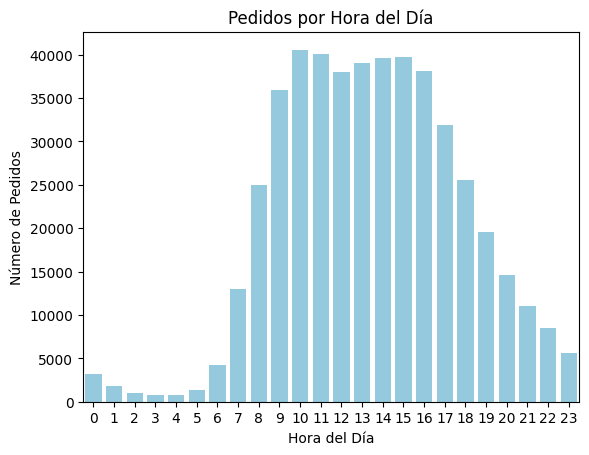

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.countplot(data=orders, x='order_hour_of_day', color='skyblue')
plt.title('Pedidos por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Pedidos')
plt.xticks(range(24))
plt.show()

Escribe aquí tus conclusiones
Con ayuda de una representación visual de los datos se puede ver que el pico más alto de pedidos se encuentra entre las 8hrs y las 18hrs. En este rango el pico más alto se encuentra a las 10hrs y el segundo a las 11hrs. 
Esta información nos ayuda en toma de decisión de menor y mayor impacto. Es decir desde la organización de las guardias del personal para evitar burn out. En decisiones de mayor impacto es un principio de partida para crear estrategias de marketing y ventas. 

### [A3] ¿Qué día de la semana compran víveres las personas?

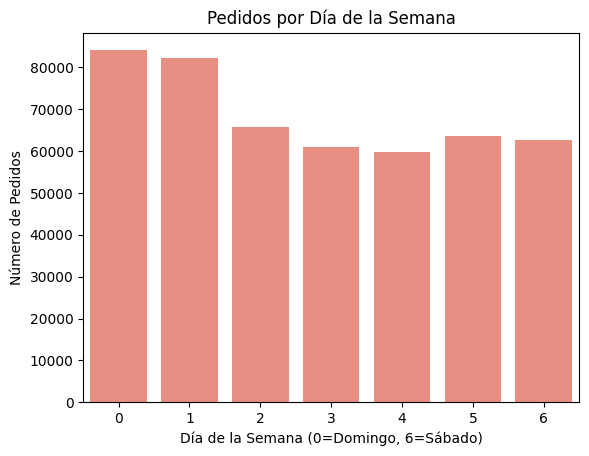

In [65]:
plt.figure()
sns.countplot(data=orders, x='order_dow', color='salmon')
plt.title('Pedidos por Día de la Semana')
plt.xlabel('Día de la Semana (0=Domingo, 6=Sábado)')
plt.ylabel('Número de Pedidos')
plt.show()

Escribe aquí tus conclusiones
Sin duda alguna el Domingo es el día con más pedidos, y son una ligera diferencia menor el Lunes es el segundo día con más demanda en pedidos. Es interesante que de Martes a Sábado los pedidos con menor diferencia a los picos más altos con una constante que oscila entre los 60,500 y los 60,000 pedidos aproximada. 

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

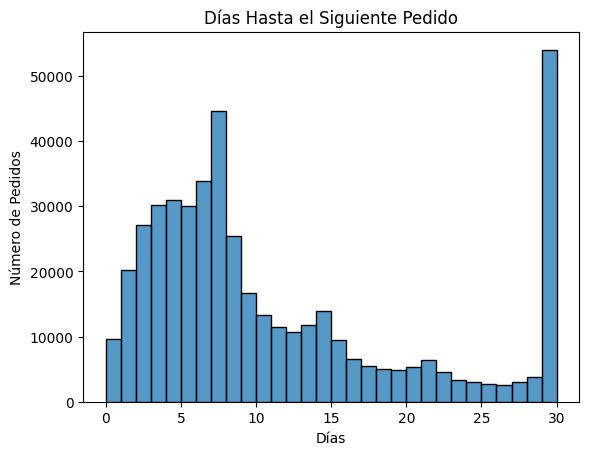

Mínimo: 0.0
,Máximo: 30.0


In [66]:
plt.figure()
sns.histplot(data=orders, x='days_since_prior_order', bins=30, kde=False)
plt.title('Días Hasta el Siguiente Pedido')
plt.xlabel('Días')
plt.ylabel('Número de Pedidos')
plt.show()

print("Mínimo:", orders['days_since_prior_order'].min())
print("Máximo:", orders['days_since_prior_order'].max())

Escribe aquí tus conclusiones
De acuerdo con los datos obtenidos en este gráfico, hay una gran tendencia a hacer pedidos mensuales, a los 30 días. En segumdo es una tendecia a hacerlo semanal, cada 8 días. Me atrevería a decir que los habitos de consumo en este grafico suguieren que los pedidos realizados en menor tiempo de espera despues de su pedido seguiré algún olvido en el pedido original o el uso de descuentos generados por una robusta compra. Identificando a los usuarios que realizan ordenes mensuales se les podria hacer un seguimiento de sus compras destacadas y ayudar con notificaciones de pedidos dias antes del plazo donde realizara su compra nuevamente.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [45]:
#  Wednesday = miércoles (3) , saturday = sábado (6)
wednesday = orders[orders['order_dow'] == 3]
saturday = orders[orders['order_dow'] == 6]

In [46]:
# Conteo por hora
wednesday_counts = wednesday['order_hour_of_day'].value_counts().sort_index()
saturday_counts = saturday['order_hour_of_day'].value_counts().sort_index()

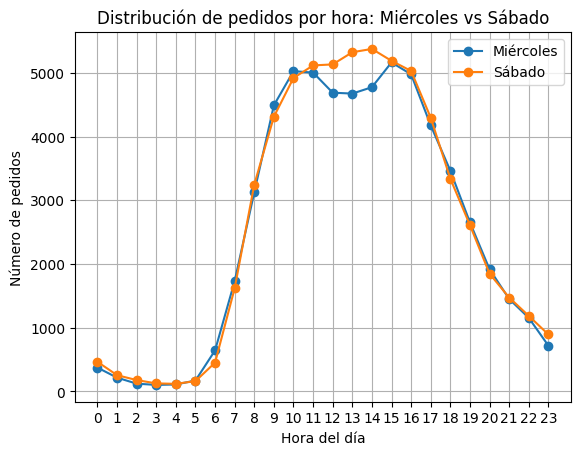

In [67]:
# Gráfico
plt.figure()
plt.plot(wednesday_counts.index, wednesday_counts.values, label='Miércoles', marker='o')
plt.plot(saturday_counts.index, saturday_counts.values, label='Sábado', marker='o')
plt.title('Distribución de pedidos por hora: Miércoles vs Sábado')
plt.xlabel('Hora del día')
plt.ylabel('Número de pedidos')
plt.xticks(range(24))
plt.legend()
plt.grid()
plt.show()

Escribe aquí tus conclusiones
En genral ambos días muentras tendencias similares. Entre sus diferencias se destaca la caida de las ordenes los miércoles al medio día. Mientras que el sábado esta misma hora es el inicio del periodo con pico los picos más altos. Las 14hrs es el momento del día donde hay mayor actividad entre los usuarios. 

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [48]:
orders_per_user = orders.groupby('user_id')['order_id'].count()

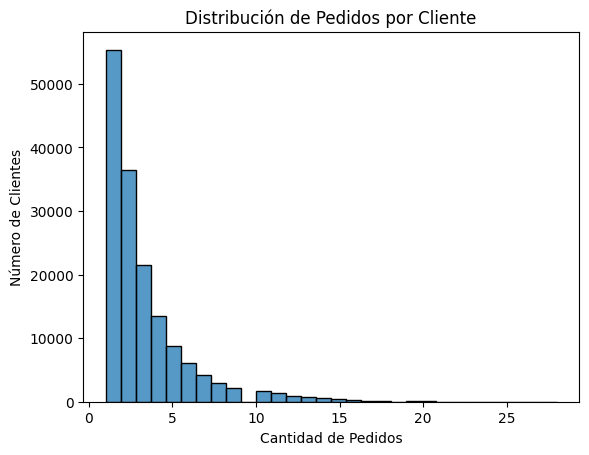

In [68]:
# Gráfico
plt.figure()
sns.histplot(orders_per_user, bins=30, kde=False)
plt.title('Distribución de Pedidos por Cliente')
plt.xlabel('Cantidad de Pedidos')
plt.ylabel('Número de Clientes')
plt.show()

Escribe aquí tus conclusiones
El gráfico nos indica la retención de clientes. Si bien más de 50,000 usuarios han realizado una orden, pero solamente poco más de la mitad de cleintes realizan una segunda orden y menos de la mitad hacen un tercer peido.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [50]:
# Tabla de productos
top_products = order_products['product_id'].value_counts().head(20).reset_index()
top_products.columns = ['product_id', 'count']
top_products_merge = top_products.merge(products, on='product_id', how='left')

In [51]:
print(top_products_merge[['product_id', 'product_name', 'count']])

    product_id              product_name  count
,0        24852                    BANANA  66050
,1        13176    BAG OF ORGANIC BANANAS  53297
,2        21137      ORGANIC STRAWBERRIES  37039
,3        21903      ORGANIC BABY SPINACH  33971
,4        47209      ORGANIC HASS AVOCADO  29773
,5        47766           ORGANIC AVOCADO  24689
,6        47626               LARGE LEMON  21495
,7        16797              STRAWBERRIES  20018
,8        26209                     LIMES  19690
,9        27845        ORGANIC WHOLE MILK  19600
,10       27966       ORGANIC RASPBERRIES  19197
,11       22935      ORGANIC YELLOW ONION  15898
,12       24964            ORGANIC GARLIC  15292
,13       45007          ORGANIC ZUCCHINI  14584
,14       39275       ORGANIC BLUEBERRIES  13879
,15       49683            CUCUMBER KIRBY  13675
,16       28204        ORGANIC FUJI APPLE  12544
,17        5876             ORGANIC LEMON  12232
,18        8277  APPLE HONEYCRISP ORGANIC  11993
,19       40706    OR

Escribe aquí tus conclusiones

En un listado de los 20 articulos con mas demanda se puede decir con toda confianza que los usuarios prefieren Bananas siendo este el producto favorito.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [52]:
items_per_order = order_products.groupby('order_id')['product_id'].count()

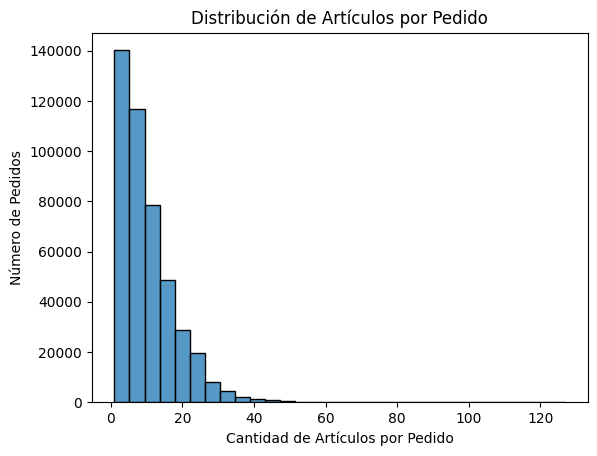

In [69]:
plt.figure()
sns.histplot(items_per_order, bins=30, kde=False)
plt.title('Distribución de Artículos por Pedido')
plt.xlabel('Cantidad de Artículos por Pedido')
plt.ylabel('Número de Pedidos')
plt.show()

In [54]:
# Valores mínimo y máximo
print("Mínimo:", items_per_order.min())
print("Máximo:", items_per_order.max())

Mínimo: 1
,Máximo: 127


Escribe aquí tus conclusiones

De al menos 14,000 pedidos registrados han sido por al menos entre uno y 6 articulos por orden. El rango máximo es de 127 articulos por orden, cuando en el Paso 2 de este projecto se detecto que el número máximo de articulos por pedidos era de 64. La clara tendencia es que el mayor número de pedidos es por menos de 20 articulos por orden.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [55]:
# Productos reordenados
reordered_counts = order_products[order_products['reordered'] == 1]['product_id'].value_counts().head(20).reset_index()
reordered_counts.columns = ['product_id', 'reorder_count']
reordered_counts = reordered_counts.merge(products, on='product_id', how='left')

In [56]:
print(reordered_counts[['product_id', 'product_name', 'reorder_count']])

    product_id              product_name  reorder_count
,0        24852                    BANANA          55763
,1        13176    BAG OF ORGANIC BANANAS          44450
,2        21137      ORGANIC STRAWBERRIES          28639
,3        21903      ORGANIC BABY SPINACH          26233
,4        47209      ORGANIC HASS AVOCADO          23629
,5        47766           ORGANIC AVOCADO          18743
,6        27845        ORGANIC WHOLE MILK          16251
,7        47626               LARGE LEMON          15044
,8        27966       ORGANIC RASPBERRIES          14748
,9        16797              STRAWBERRIES          13945
,10       26209                     LIMES          13327
,11       22935      ORGANIC YELLOW ONION          11145
,12       24964            ORGANIC GARLIC          10411
,13       45007          ORGANIC ZUCCHINI          10076
,14       49683            CUCUMBER KIRBY           9538
,15       28204        ORGANIC FUJI APPLE           8989
,16        8277  APPLE HONEYCRIS

Escribe aquí tus conclusiones
De una lista con los 20 articulos más reordenados por los usuarios nos deja claro que por amplia ventaja las Bananas son el producto que no falta en las ordenes.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [57]:
# Total de veces que fue pedido cada producto
total_orders_per_product = order_products['product_id'].value_counts()

# Total de veces que fue reordenado
reorders_per_product = order_products[order_products['reordered'] == 1]['product_id'].value_counts()

In [58]:
# Tasa de repetición
reorder_rate = (reorders_per_product / total_orders_per_product).reset_index()
reorder_rate.columns = ['product_id', 'reorder_rate']
reorder_rate = reorder_rate.merge(products, on='product_id', how='left')

In [59]:
print(reorder_rate.sort_values(by='reorder_rate', ascending=False).head(10))

       product_id  reorder_rate  \
,10973       12038           1.0   
,1646         1809           1.0   
,33130       36122           1.0   
,2929         3205           1.0   
,38398       41901           1.0   
,42526       46398           1.0   
,9464        10378           1.0   
,28455       31026           1.0   
,42558       46437           1.0   
,19043       20787           1.0   
,
,                                            product_name  aisle_id  \
,10973           FOR WOMEN MAXIMUM ABSORBENCY L UNDERWEAR       126   
,1646   SLOW KETTLE STYLE SANTA FE CHICKEN ENCHILADA S...        69   
,33130                                  SPICY CHILI BEANS        59   
,2929             ORIGINAL PURE CHOCOLATE WHIPPET COOKIES        61   
,38398   MOISTURIZING LOTIONIZED SHAVE GEL WITH VITAMIN E        55   
,42526                          CHOCOLATE ANIMAL CRACKERS        61   
,9464                          HONEY FLAKE & OAT CLUSTERS       121   
,28455                            D

Escribe aquí tus conclusiones
En una lista de los 10 articulos con mayor tasa de repetición en orden es FOR WOMEN MAXIMUM ABSORBENCY L UNDERWEAR el que se coloca a la cabeza. 


### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [60]:
orders_users = orders[['order_id', 'user_id']].merge(order_products, on='order_id')
user_reorders = orders_users.groupby('user_id')['reordered'].agg(['sum', 'count'])
user_reorders['reorder_rate'] = user_reorders['sum'] / user_reorders['count']

In [61]:
print(user_reorders['reorder_rate'].describe())

count    149626.000000
,mean          0.494853
,std           0.292685
,min           0.000000
,25%           0.272727
,50%           0.500000
,75%           0.724138
,max           1.000000
,Name: reorder_rate, dtype: float64


Escribe aquí tus conclusiones

La mayoría de los usuarios repiten una parte considerable de sus compras, lo que indica hábitos de consumo estables. Usuarios con una tasa de repetición alta podrían estar muy familiarizados con la plataforma. En contraste, Usuarios con tasas bajas pueden ser nuevos o estar explorando productos.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [62]:
# Filtramos donde add_to_cart_order == 1
first_items = order_products[order_products['add_to_cart_order'] == 1]

In [63]:
top_first_items = first_items['product_id'].value_counts().head(20).reset_index()
top_first_items.columns = ['product_id', 'first_add_count']
top_first_items = top_first_items.merge(products, on='product_id', how='left')

In [64]:
print(top_first_items[['product_id', 'product_name', 'first_add_count']])

    product_id                 product_name  first_add_count
,0        24852                       BANANA            15562
,1        13176       BAG OF ORGANIC BANANAS            11026
,2        27845           ORGANIC WHOLE MILK             4363
,3        21137         ORGANIC STRAWBERRIES             3946
,4        47209         ORGANIC HASS AVOCADO             3390
,5        21903         ORGANIC BABY SPINACH             3336
,6        47766              ORGANIC AVOCADO             3044
,7        19660                 SPRING WATER             2336
,8        16797                 STRAWBERRIES             2308
,9        27966          ORGANIC RASPBERRIES             2024
,10       44632   SPARKLING WATER GRAPEFRUIT             1914
,11       49235          ORGANIC HALF & HALF             1797
,12       47626                  LARGE LEMON             1737
,13         196                         SODA             1733
,14       38689     ORGANIC REDUCED FAT MILK             1397
,15      

Escribe aquí tus conclusiones

La importancia de conocer este primer producto añadido a la lista de compra es el detonante de los siguientes articulos en la lista. Así mismo, funcionan como anclas mentales para detonar una compra o la busqueda de un articulo en particular. 

### Conclusion general del proyecto: